Authors:

Olga Zagovora, zagovora@uni-koblenz.de

René Pickhardt rpickhardt@uni-koblenz.de

In [1]:
import pandas as pd

store = pd.HDFStore('files_for_assignment8/store.h5',mode="r")#read.h5 file
df1=store['df1'] 
#remove articles with very short text
df1=df1[df1.text!=""]
df1=df1[df1.text.str.len()>20]
#df2

#import nltk.data
#tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
#sent=tokenizer.tokenize(df1.loc[0].text) #create list of sentences

#simple word tokenizer
#from nltk import word_tokenize
#word_tokenize(df1.loc[0].text,language='english')

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df1["text"]=df1.text.apply(lambda x: tokenizer.tokenize(x.decode('utf8')))

# Jaccard Similarity

In [4]:
def jaccard_coefficient(a,b):
    intersection = len(set.intersection(*[set(a), set(b)]))
    union = len(set.union(*[set(a), set(b)]))
    return intersection/float(union)
%timeit jaccard_coefficient(set(df1.iloc[0].text), set(df1.iloc[8].text))

jaccard3= lambda a,b: float(len(a.intersection(b))) /len(a.union(b))
jaccard = lambda a,b: float(len(set.intersection(*[set(a), set(b)]))) /len(a.union(b))
jaccard2 = lambda a,b: float(len(set.intersection(*[set(a), set(b)]))) /len(set.union(*[set(a), set(b)]))

100 loops, best of 3: 1.81 ms per loop


In [5]:
%timeit jaccard(set(df1.iloc[0].text), set(df1.iloc[8].text))
%timeit jaccard2(df1.iloc[0].text, df1.iloc[8].text)
%timeit jaccard2(set(df1.iloc[0].text), set(df1.iloc[8].text))
%timeit jaccard3(set(df1.iloc[0].text), set(df1.iloc[8].text))

100 loops, best of 3: 1.64 ms per loop
1000 loops, best of 3: 1.74 ms per loop
1000 loops, best of 3: 1.69 ms per loop
100 loops, best of 3: 1.51 ms per loop


In [6]:
calcJaccardSimilarity = lambda a,b: float(len(a.intersection(b))) / len(a.union(b))

print len(df1)

26136


In [7]:
print "Similarity of Germany and Europe:",calcJaccardSimilarity(set(df1[df1.name=="Germany"].text.values[0]),\
                                                                set(df1[df1.name=="Europe"].text.values[0]))

Similarity of Germany and Europe: 0.042962962963


# Cosine similarity

1. Count the term frequency of each term for each article
2. Count the document frequencies of each term.
3. For each article id provide a dictionary of terms occuring in the article together with their tf-idf scores as the corresponding values.
4. Implement a function calculateCosineSimilarity(tfIdfDict1, tfIdfDict2) that computes the cosine similarity for two sparse tf-idf vectors and returns the value.
5. Compute the result for the articles Germany and Europe.

## term frequency

In [8]:
from collections import Counter
df1["tf"]=df1.text.apply(lambda x: Counter(x))
df1

,name,text,tf
0,German,"[German, can, mean, different, things, It, can...","{u'who': 2, u'Federal': 1, u'When': 1, u'it': ..."
1,Coat_of_Arms_of_Germany_0bb4,"[The, coat, of, arms, of, Germany, German, Wap...","{u'and': 5, u'insignia': 1, u'supreme': 1, u't..."
2,Flag_of_Germany_0658,"[The, flag, of, Germany, German, _Bundesflagge...","{u'and': 2, u'gold': 1, u'is': 2, u'Ships': 1,..."
3,Das_Lied_der_Deutschen_3057,"[Das, Lied, der, Deutschen, The, Song, of, the...","{u'unified': 2, u'all': 2, u'Kaiser': 1, u'Fre..."
4,Map,"[A, map, is, usually, a, picture, of, the, Ear...","{u'interpretation': 1, u'paper': 2, u'relation..."
5,National_anthem,"[A, national, anthem, is, a, song, that, the, ...","{u'and': 1, u'lyrics': 1, u'people': 1, u'nati..."
6,Official_language,"[An, official, language, is, a, language, that...","{u'Canada': 1, u'named': 1, u'official': 3, u'..."
7,Square_kilometre,"[A, square, kilometre, sometimes, written, _km...","{u'kilometre': 3, u'square': 4, u'often': 1, u..."
8,German_language,"[The, German, language, German, _Deutsch_, or,...","{u'Canada': 1, u'called': 1, u'United': 1, u's..."
9,Geography,"[Geography, is, the, study, of, the, Earth, an...","{u'all': 1, u'words': 1, u'human': 1, u'winds'..."


## document frequencies of each term

In [9]:
from itertools import chain
vocabular=list(set(chain(*df1.text.values)))
print "Vocabular:", len(vocabular)

Vocabular: 126329


In [10]:
df=dict.fromkeys(vocabular,0)
for i in range(0,len(df1)):
    for w in set(df1.iloc[i].text):
        df[w] +=  1

## For each article id provide a dictionary of terms occuring in the article together with their tf-idf scores as the corresponding values.

In [11]:
import math
N = float(len(df1))

In [12]:
def tf_idf(dtf):
    tfidf={}
    length =0.0
    for w in set(dtf.keys()):        
        temp_tfidf=dtf[w]* math.log(N/df[w])
        tfidf[w]= temp_tfidf
        length += temp_tfidf * temp_tfidf
    return tfidf,math.sqrt(length) 

df1["tfidf"], df1["length"] = zip(*df1.apply(lambda x: tf_idf(x.tf),axis=1))

In [13]:
df1

,name,text,tf,tfidf,length
0,German,"[German, can, mean, different, things, It, can...","{u'who': 2, u'Federal': 1, u'When': 1, u'it': ...","{u'also_': 9.07245666461, u'Federal': 5.251088...",28.808046
1,Coat_of_Arms_of_Germany_0bb4,"[The, coat, of, arms, of, Germany, German, Wap...","{u'and': 5, u'insignia': 1, u'supreme': 1, u't...","{u'and': 1.84724013574, u'insignia': 7.9738443...",53.472084
2,Flag_of_Germany_0658,"[The, flag, of, Germany, German, _Bundesflagge...","{u'and': 2, u'gold': 1, u'is': 2, u'Ships': 1,...","{u'and': 0.738896054297, u'gold': 4.6536160568...",51.378968
3,Das_Lied_der_Deutschen_3057,"[Das, Lied, der, Deutschen, The, Song, of, the...","{u'unified': 2, u'all': 2, u'Kaiser': 1, u'Fre...","{u'unified': 12.6418427031, u'all': 4.11169396...",147.048901
4,Map,"[A, map, is, usually, a, picture, of, the, Ear...","{u'interpretation': 1, u'paper': 2, u'relation...","{u'interpretation': 6.23924332056, u'paper': 9...",71.834807
5,National_anthem,"[A, national, anthem, is, a, song, that, the, ...","{u'and': 1, u'lyrics': 1, u'people': 1, u'nati...","{u'and': 0.369448027148, u'lyrics': 5.56589876...",21.275120
6,Official_language,"[An, official, language, is, a, language, that...","{u'Canada': 1, u'named': 1, u'official': 3, u'...","{u'Canada': 3.94255794969, u'named': 2.5888397...",24.128528
7,Square_kilometre,"[A, square, kilometre, sometimes, written, _km...","{u'kilometre': 3, u'square': 4, u'often': 1, u...","{u'kilometre': 21.6798899223, u'square': 18.00...",40.216047
8,German_language,"[The, German, language, German, _Deutsch_, or,...","{u'Canada': 1, u'called': 1, u'United': 1, u's...","{u'Canada': 3.94255794969, u'called': 1.558747...",68.190516
9,Geography,"[Geography, is, the, study, of, the, Earth, an...","{u'all': 1, u'words': 1, u'human': 1, u'winds'...","{u'all': 2.05584698072, u'words': 3.5325011641...",107.146724


Implement a function calculateCosineSimilarity(tfIdfDict1, tfIdfDict2)
that computes the cosine similarity for two sparse tf-idf vectors and returns the
value.

In [14]:
idx_Germany=df1[df1.name=="Germany"].index.values[0]
idx_Europe=df1[df1.name=="Europe"].index.values[0]
nidx_Germany=df1.index.get_loc(idx_Germany)
nidx_Europe=df1.index.get_loc(idx_Europe)

In [15]:
%timeit df1[df1.name=="Germany"].tfidf.values[0]
%timeit df1.iloc[nidx_Germany].tfidf
%timeit df1.loc[idx_Germany].tfidf

10 loops, best of 3: 20.2 ms per loop
1000 loops, best of 3: 940 µs per loop
1000 loops, best of 3: 1.11 ms per loop


In [16]:
def calculateCosineSimilarity(article1_nidx, article2_nidx):
    n = 0
    tfIdfDict1=df1.iloc[article1_nidx].tfidf
    tfIdfDict2=df1.iloc[article2_nidx].tfidf
    for w in tfIdfDict1.keys():
        if w in tfIdfDict2:
            n += tfIdfDict1[w]*tfIdfDict2[w]
    l1=df1.iloc[article1_nidx].length
    l2=df1.iloc[article2_nidx].length
    return n/(l1*l2)


%timeit calculateCosineSimilarity(nidx_Germany,nidx_Europe)
calculateCosineSimilarity(nidx_Germany,nidx_Europe)

100 loops, best of 3: 3.88 ms per loop


0.13732813357523682

In [17]:
def calculateCosineSimilarity(x1,x2,df_):
    n=0
    tfidf1=df_.iloc[x1].tfidf
    tfidf2=df_.iloc[x2].tfidf
    for w in tfidf1.keys():
        if w in tfidf2:
            n += tfidf1[w]*tfidf2[w]
    l1=df_.iloc[x1].length
    l2=df_.iloc[x2].length
    return n/(l1*l2)
%timeit calculateCosineSimilarity(nidx_Germany,nidx_Europe,df1)


100 loops, best of 3: 3.77 ms per loop


# Similarity of Graphs

In [18]:
df2=store['df2'] 
df2=df2.loc[df1.index.values]
print "Graph Similarity of Germany and Europe:",calcJaccardSimilarity(set(df2[df2.name=="Germany"].out_links.values[0]),\
                                                                set(df2[df2.name=="Europe"].out_links.values[0]))

Graph Similarity of Germany and Europe: 0.273076923077


# How similar have our similarities been? 

1. Will the most similar articles to a certain article always be the same independent
which model we use?
2. How similar are these measures to each other? How can you statistically compare them?

Assume you could use the similarity measure to compute the top k most similar articles
for each article in the document collection. We want to analyze how diff erent the rankings
for these various models are.

Do some research to ﬁnd a statistical measure (either from the lectures of part 2 or by
doing a web search and coming up with something that we haven’t discussed yet) that
could be used best to compare various rankings for the same object.
Explain in a short text which measure you would use in such an experiment and why
you think it is usefull for our task.

In [19]:
#let's look into n most similar articles with the article Germany
import Queue as queue
    
def getTopRankedDocuments(article_nidx,rankingFunction,df_,column,k):
    word_set=set(df_.iloc[article_nidx][column])
    prio_queue = queue.PriorityQueue()
    for i in set(range(0,len(df_)))-set([article_nidx]):
        jc =  rankingFunction(set(df_.iloc[i][column]),word_set)
        prio_queue.put((jc,jc,df_.iloc[i]["name"]))
        if prio_queue.qsize() > k:
            prio_queue.get()
    results = []
    while not prio_queue.empty():
        item = prio_queue.get()
        results.append(item)
    return list(reversed(results))

import timeit
start_time = timeit.default_timer()
# code you want to evaluate
getTopRankedDocuments(nidx_Germany,calcJaccardSimilarity,df1,"text",5)

[(0.2297008547008547, 0.2297008547008547, u'Prussia'),
 (0.21611001964636542, 0.21611001964636542, u'World_War_I_9429'),
 (0.21418020679468242, 0.21418020679468242, u'Politics_of_Germany_8451'),
 (0.20480668756530826, 0.20480668756530826, u'Netherlands'),
 (0.20168776371308017, 0.20168776371308017, u'Poland')]

In [20]:
elapsed = timeit.default_timer() - start_time
elapsed

93.82651952984656

In [21]:
getTopRankedDocuments(nidx_Germany,calcJaccardSimilarity,df2,"out_links",5)

[(0.4008097165991903, 0.4008097165991903, u'Belgium'),
 (0.39215686274509803, 0.39215686274509803, u'Lithuania'),
 (0.38223938223938225, 0.38223938223938225, u'Bulgaria'),
 (0.3798449612403101, 0.3798449612403101, u'Latvia'),
 (0.3793103448275862, 0.3793103448275862, u'Estonia')]

In [22]:
def getTopRankedDocuments2(article_nidx,rankingFunction,df_,k):
    prio_queue = queue.PriorityQueue()
    for i in set(range(0,len(df_)))-set([article_nidx]):
        jc =  rankingFunction(i,article_nidx,df_)
        prio_queue.put((jc,jc,df_.iloc[i]["name"]))
        if prio_queue.qsize() > k:
            prio_queue.get()
    results = []
    while not prio_queue.empty():
        item = prio_queue.get()
        results.append(item)
    return list(reversed(results))

getTopRankedDocuments2(nidx_Germany,calculateCosineSimilarity,df1,5)

[(0.49646129517424464, 0.49646129517424464, u'German_reunification'),
 (0.48285432107895521, 0.48285432107895521, u'Treaty_of_Versailles_58e2'),
 (0.4334512105976091, 0.4334512105976091, u'Luftwaffe'),
 (0.38592021213403976, 0.38592021213403976, u'Soviet_occupation_zone'),
 (0.37802661576835589, 0.37802661576835589, u'Berlin_Wall_24be')]

### Similarity of ranked lists:

1. Jaccard similariry of the first n most similar countries.
2. Rank based error
3. Spearman rank correlation
4. Kendal tau correlation
5. Rank biased overlap 
6. Other (e.g., weighted rank correlations, Generalized distances between rankings, expected weighted hoeffding distance, DCG [Discounted Cumulative Gain] and nDCG [normalized DCG] )

Other similarity measures (William et al.,2010):
![caption](files/ranksim.png)

### Jaccard similarity of first 10 most similar documents

1. Why it is not the best slution?
2. How to improve the approach?


In [ ]:
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#

steps:
- calculate the length of set intersection at various depth
- calculate the average overlap score

Known as the intersection metric (Fagin et al.,2003) or named average accuracy (Wu and Crestani, 2003)

References:

 Fagin, Ronald, Ravi Kumar, and D. Sivakumar. "Comparing top k lists." SIAM Journal on Discrete Mathematics 17.1 (2003): 134-160.
 
 Wu, Shengli, and Fabio Crestani. "Methods for ranking information retrieval systems without relevance judgments." Proceedings of the 2003 ACM symposium on Applied computing. ACM, 2003.

In [1]:
#!conda install mathjax

Example:

Example of jaccard and cosine similarities for article "X":

\begin{array}{|c | c |}
\hline
  & similarity\, jacc & similarity\, cos \\ \hline
article1 & 0.27 & 0.15 \\ \hline
article2 & 0.23 & 0.07 \\ \hline
article3 & 0.24 & 0.05 \\ \hline
\end{array}

Similarity_Jacc ["X"] ={article1, article3, article2} 

Similarity_Cos  ["X"] ={article1, article2, article3} 

\begin{array}{|c | l | l| c|}
\hline
 depth  & Similarity\_Jacc\, at\, depth\, d  & Similarity\_Cos\, at\, depth\, d & set\, intersection\,/\,d\,  ->\, A_k  \\ \hline
1 & \{article1\} & \{article1\} & 1/1=1 \\ \hline
2 & \{article1,article3\} & \{article1,article2\} & 1/2=0.5\\ \hline
3 & \{article1,article3,article2\} & \{article1,article2,article3\} & 3/3=1 \\ \hline
\end{array}

the average overlap score = $\frac{1+0.5+0.1}{3}=0.83$

### Rank based error

$$ Error_{rank}= \sum_{i=1}^{n}{ \frac{ |rank_i - rank\_baseline_i|} {rank\_baseline_i} }$$


1. Why it is not the best solution?
2. How to improve the approach?




### Spearman rank correlation

- convert values into ranks
- fit a line (pearson correlation)  

Populating the interactive namespace from numpy and matplotlib
SpearmanrResult(correlation=0.79999999999999993, pvalue=0.20000000000000007)


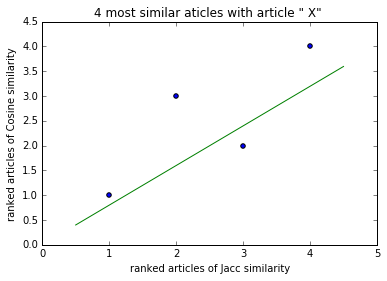

In [24]:
%pylab inline
import matplotlib.pyplot as plt
from scipy.stats import spearmanr,rankdata

a=[0.23,0.27,0.24,0.29]
b=[0.05,0.07,0.15,0.17]
print spearmanr(a,b)
plt.scatter(rankdata(a),rankdata(b))
x=arange(0.5,5,0.5)

plt.title("4 most similar aticles with article \" X\" ")
plt.xlabel("ranked articles of Jacc similarity")
plt.ylabel("ranked articles of Cosine similarity")
plt.plot(x,0.799*x, "g");


### Kendal tau correlation

$$ \tau = \frac{\#\, concordant\, pairs\, -\, \#\, disconcordant\, pairs} {1/2 \times n \times (n-1) } $$

- If the agreement between the two rankings is perfect  the coefficient is 1. 
- If the disagreement between the two rankings is perfect the coefficient has value −1. 
- If X and Y are independent, then we would expect the coefficient to be approximately zero.

Number of concordant pairs is a number of pairs for which relative ordering is preserved in the two lists. For instance, if item A appears before the item B in list 1 and list 2 too.

Example of jaccard and cosine similarities for article "X":

\begin{array}{|c | c |}
\hline
  & similarity\, jacc & similarity\, cos \\ \hline
article1 & 0.27 & 0.15 \\ \hline
article2 & 0.23 & 0.07 \\ \hline
article3 & 0.24 & 0.05 \\ \hline
\end{array}

Concordant pairs:

(article1, article2), (article1, article3)

Disconcordant pairs:

(article2, article3)

$$ \tau = \frac {2-1} {3} = 1/3$$


To deal with ties, we will use kendall tau b which has tie correction.
$$ \tau_B = \frac{\#\, concordant\, pairs\, -\, \#\, disconcordant\, pairs} {\sqrt {N_1} \times \sqrt {N_2} } $$
where $N_1$ is the number of pairs not tied in the group of similarity_1  and $N_2$ is the number of pairs not tied in the group of similarity_2. 


1. What if we don't care about ranking of the least similar articles but do care about ranking of the first 10 most similar articles? [top-weighteness problem]
2. What if similarity lists are of different length? [dis-jointness problem] For example, if we remove all zero's from the ranked lists.

### Rank-biased overlap (RBO) (Webber et al., 2010)

Why not simply use the average overlap score?

Example -> Blackboard

Approach have to bias the proportional overlap at each depth by a convergent series of weights (that is, a series whose sum is bounded). As a result, the infinite tail does not dominate the finite head. 


RBO
- uses expected average overlap
- has a parameter which determines the strength of the weighting to top ranks. The weights are geometrically decreasing and never reach zero
- scores are comparable independent of depth used in calculation

$$RBO = (1 − p) \sum_{d=1}^{\infty} (p^{d−1} \cdot A_d) $$
where parameter $p$ determines how steep the decline in weights is, $A_d$ is the proportion of compaired sets that are overlapped at depth $d$.

"For instance, $p= 0.9$ means that the first 10 ranks have 86% of the weight of the evaluation; to give the top 50
ranks the same weight involves taking $p= 0.98$ as the setting.  "


References :

Webber, William, Alistair Moffat, and Justin Zobel. "A similarity measure for indefinite rankings." ACM Transactions on Information Systems (TOIS) 28.4 (2010): 20.

#### Steps for correlations, RBO, and jaccard :

As we have 3 measures, we will have 3*2/2=3 pairs of different measures.

Correlate each article ranks between each pair of similarity measures. 

- look into correlation coefficients
- systematicly higher correlation coefficients will tell us that these two similarity measures are closer (more similar)

Compute RBO/jaccard for sorted lists of the most similar articles to "seed" article. 
 
 - systematicly higher RBO/jaccard will tell us that these two similarity measures are closer (more similar)

Compute Rank based error for each article ranks between each pair of similarity measures.
- systematicly lower errors will tell us that these two similarity measures are closer (more similar)

# Implement the measure and do the experiment

1. How many similarity computations would have to be done if you wished to do so?
2. How much time would roughly be consumed to do all of these computations?

A better strategy might be to select a couple of articles for which you could compute
your meassure. One strategy would be to select the 100 longest articles. Another strategy
might be to randomly select 100 articles from our corpus.

### 1. How many similarity computations would have to be done if you wished to do so?

$$ n \cdot (n-1)/2 $$

In [48]:
print "We have",len(df1),"articles. We can create",len(df1)*(len(df1)-1)/2,"pairs, since similarity(d1,d2)=similarity(d2,d1)."
print "Thus, we need",len(df1)*(len(df1)-1)/2,"compuatations."
num_comput=len(df1)*(len(df1)-1)/2

 We have 26136 articles. We can create 341532180 pairs, since similarity(d1,d2)=similarity(d2,d1).
Thus, we need 341532180 compuatations.


### 2. How much time would roughly be consumed to do all of these computations?

In [49]:
%timeit calcJaccardSimilarity(set(df2.loc[idx_Germany].out_links),set(df2.loc[idx_Europe].out_links))

%timeit calcJaccardSimilarity(set(df2.iloc[nidx_Germany].out_links),set(df2.iloc[nidx_Europe].out_links))
%timeit calcJaccardSimilarity(set(df1.iloc[nidx_Germany].text),set(df1.iloc[nidx_Germany].text))


100 loops, best of 3: 1.85 ms per loop
The slowest run took 4.26 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 2.73 ms per loop
100 loops, best of 3: 4.1 ms per loop


In [46]:
%timeit calculateCosineSimilarity(nidx_Germany,nidx_Europe)

100 loops, best of 3: 6.33 ms per loop


In [50]:
print "=====> For Jacard Similarity on WORDS set we meed:"
print "for",num_comput,"compuatations we need:",num_comput*3.72/1000,"seconds =",\
                num_comput*3.72/1000/60,"minutes =",num_comput*3.72/1000/3600,"hours."
print "=====> For Jacard Similarity on LINKS set we meed:"
print "for",num_comput,"compuatations we need:",num_comput*1.66/1000,"seconds =",\
                num_comput*1.66/1000/60,"minutes =",num_comput*1.66/1000/3600,"hours."
print "=====> For Cosine Similarity on WORDS we meed:"
print "for",num_comput,"compuatations we need:",num_comput*6.33/1000,"seconds =",\
                num_comput*77.9/1000/60,"minutes =",num_comput*77.9/1000/3600,"hours."

=====> For Jacard Similarity on WORDS set we meed:
for 341532180 compuatations we need: 1270499.7096 seconds = 21174.99516 minutes = 352.916586 hours.
=====> For Jacard Similarity on LINKS set we meed:
for 341532180 compuatations we need: 566943.4188 seconds = 9449.05698 minutes = 157.484283 hours.
=====> For Cosine Similarity on WORDS we meed:
for 341532180 compuatations we need: 2161898.6994 seconds = 443422.6137 minutes = 7390.376895 hours.


Computer your three similarity measures and evaluate them for these two strategies
of selecting test data. Present your results. Will the results depend on the method for
selecting articles? What are your ﬁndings?

### select the 100 random articles and do the experiment

In [51]:
df_100rand=df1.sample(n=100)
df_100rand_url=df2.loc[df_100rand.index.values]

In [117]:
def cal_sim(x,df_):
    sim={}
    for i in range(df_.index.get_loc(x.name)+1,len(df_)):
        sim[df_.iloc[i].name]=calcJaccardSimilarity(set(x.out_links),set(df_.iloc[i].out_links))
    return sim   

def create_simmetric_df(df_,function_used):
    df_new=df_.apply(lambda x: function_used(x,df_),axis=1)
    df_result=pd.DataFrame(dict([(k,pd.Series(v)) for k,v in df_new.iteritems()]))#matrix 100*100
    df_result.fillna(df_result.transpose(),inplace=True)
    df_result=df_result.append(pd.Series(df_new.iloc[0],name=df_new.index[0]))
    return df_result

df_graph_jac=create_simmetric_df(df_100rand_url,cal_sim)
df_graph_jac

,159,457,832,1006,1132,1509,1743,2213,2214,2240,...,25165,25336,25377,25608,25845,25957,26831,27212,27365,27430
159,NaN,0.000,0.000000,0.000000,0,0,0.036364,0.000000,0.000000,0,...,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
457,0.000000,NaN,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0,...,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
832,0.000000,0.000,NaN,0.000000,0,0,0.013699,0.000000,0.000000,0,...,0.024390,0,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000
1006,0.000000,0.000,0.000000,NaN,0,0,0.000000,0.000000,0.000000,0,...,0.000000,0,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013158
1132,0.000000,0.000,0.000000,0.000000,NaN,0,0.000000,0.000000,0.000000,0,...,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1509,0.000000,0.000,0.000000,0.000000,0,NaN,0.000000,0.000000,0.000000,0,...,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1743,0.036364,0.000,0.013699,0.000000,0,0,NaN,0.000000,0.000000,0,...,0.000000,0,0.008547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010870
2213,0.000000,0.000,0.000000,0.000000,0,0,0.000000,NaN,0.000000,0,...,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018519
2214,0.000000,0.000,0.000000,0.000000,0,0,0.000000,0.000000,NaN,0,...,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2240,0.000000,0.000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,NaN,...,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [118]:
def cal_sim_text(x,df_):
    sim={}
    for i in range(df_.index.get_loc(x.name)+1,len(df_)):
        sim[df_.iloc[i].name]=calcJaccardSimilarity(set(x.text),set(df_.iloc[i].text))
    return sim   

df_text_jac=create_simmetric_df(df_100rand,cal_sim_text)
df_text_jac

,159,457,832,1006,1132,1509,1743,2213,2214,2240,...,25165,25336,25377,25608,25845,25957,26831,27212,27365,27430
159,NaN,0.113924,0.044496,0.070796,0.076336,0.106383,0.070093,0.095238,0.048780,0.050505,...,0.081301,0.034483,0.090226,0.064935,0.063636,0.055556,0.037037,0.041096,0.075758,0.043182
457,0.113924,NaN,0.030769,0.100000,0.065934,0.132075,0.051136,0.142857,0.105263,0.052632,...,0.098765,0.095238,0.097826,0.151515,0.106061,0.108696,0.111111,0.103448,0.088889,0.032338
832,0.044496,0.030769,NaN,0.045673,0.109756,0.037221,0.092555,0.022670,0.020408,0.029557,...,0.044393,0.027990,0.057604,0.015385,0.051220,0.025063,0.031088,0.010363,0.058005,0.118669
1006,0.070796,0.100000,0.045673,NaN,0.120690,0.081395,0.048077,0.094595,0.056338,0.044944,...,0.079646,0.067568,0.089431,0.059701,0.070707,0.050000,0.057971,0.048387,0.073770,0.041860
1132,0.076336,0.065934,0.109756,0.120690,NaN,0.046296,0.076923,0.052083,0.043956,0.066038,...,0.051852,0.042105,0.100000,0.045977,0.050000,0.040000,0.044944,0.036585,0.102190,0.088372
1509,0.106383,0.132075,0.037221,0.081395,0.046296,NaN,0.057895,0.142857,0.074074,0.027027,...,0.105263,0.068966,0.063636,0.080000,0.098765,0.098361,0.076923,0.066667,0.075472,0.028640
1743,0.070093,0.051136,0.092555,0.048077,0.076923,0.057895,NaN,0.073864,0.033898,0.052356,...,0.059908,0.044693,0.100000,0.034682,0.054187,0.026738,0.034286,0.023669,0.071749,0.069231
2213,0.095238,0.142857,0.022670,0.094595,0.052083,0.142857,0.073864,NaN,0.095238,0.049180,...,0.081395,0.063830,0.082474,0.105263,0.084507,0.078431,0.047619,0.090909,0.085106,0.026961
2214,0.048780,0.105263,0.020408,0.056338,0.043956,0.074074,0.033898,0.095238,NaN,0.017544,...,0.074074,0.073171,0.064516,0.058824,0.075758,0.042553,0.055556,0.071429,0.032258,0.019753
2240,0.050505,0.052632,0.029557,0.044944,0.066038,0.027027,0.052356,0.049180,0.017544,NaN,...,0.060606,0.033333,0.093458,0.038462,0.047059,0.015152,0.000000,0.000000,0.065421,0.036058


In [130]:
def cal_sim_text_cos(x,df_):
    sim={}
    nidx=df_.index.get_loc(x.name)
    for i in range(nidx+1,len(df_)):
        sim[df_.iloc[i].name]=calculateCosineSimilarity(nidx,i,df_)
    return sim   

df_text_cos=create_simmetric_df(df_100rand,cal_sim_text_cos)
df_text_cos

,159,457,832,1006,1132,1509,1743,2213,2214,2240,...,25165,25336,25377,25608,25845,25957,26831,27212,27365,27430
159,NaN,0.004900,0.014953,0.002243,0.011712,0.010980,0.016608,0.014503,0.001398,0.002893,...,0.004246,0.000260,0.004217,0.000893,0.002226,0.004057,0.000741,0.000429,0.002691,0.014823
457,0.004900,NaN,0.004333,0.001519,0.001421,0.004293,0.004396,0.001186,0.001969,0.001088,...,0.003810,0.001948,0.003152,0.002705,0.003453,0.005697,0.006202,0.000660,0.002111,0.015598
832,0.014953,0.004333,NaN,0.016631,0.057423,0.006568,0.028709,0.002999,0.005338,0.013369,...,0.018680,0.018150,0.013119,0.002589,0.015028,0.010430,0.023023,0.003101,0.018338,0.036261
1006,0.002243,0.001519,0.016631,NaN,0.044502,0.001458,0.006567,0.001874,0.002769,0.010241,...,0.006089,0.005591,0.009121,0.000158,0.001526,0.000222,0.004116,0.000372,0.006297,0.061825
1132,0.011712,0.001421,0.057423,0.044502,NaN,0.001284,0.019249,0.001447,0.012726,0.022784,...,0.004184,0.009086,0.014000,0.000316,0.004468,0.000411,0.018698,0.043333,0.018504,0.048057
1509,0.010980,0.004293,0.006568,0.001458,0.001284,NaN,0.008980,0.006959,0.001786,0.000369,...,0.009898,0.002955,0.005885,0.000350,0.005920,0.007489,0.005022,0.000996,0.003803,0.007198
1743,0.016608,0.004396,0.028709,0.006567,0.019249,0.008980,NaN,0.040458,0.005362,0.009977,...,0.011254,0.008915,0.016345,0.008867,0.007097,0.002377,0.009685,0.003739,0.009574,0.024927
2213,0.014503,0.001186,0.002999,0.001874,0.001447,0.006959,0.040458,NaN,0.002289,0.001627,...,0.002981,0.000772,0.004362,0.000671,0.001982,0.000919,0.000637,0.001382,0.014774,0.020197
2214,0.001398,0.001969,0.005338,0.002769,0.012726,0.001786,0.005362,0.002289,NaN,0.001039,...,0.003317,0.002333,0.002670,0.000148,0.004173,0.000212,0.007117,0.000284,0.000561,0.003605
2240,0.002893,0.001088,0.013369,0.010241,0.022784,0.000369,0.009977,0.001627,0.001039,NaN,...,0.013210,0.005833,0.012880,0.000814,0.007564,0.000250,0.000000,0.000000,0.015396,0.010996


### select the 100 longest articles and do the experiment

In [131]:
df1["list_length"]=df1.text.apply(lambda x: len(x))
df_100long=df1.loc[df1.list_length.nlargest(n=100).index]
df_100long_url=df2.loc[df_100long.index.values]

df_100long_graph_jac=create_simmetric_df(df_100long_url,cal_sim)
df_100long_text_jac=create_simmetric_df(df_100long,cal_sim_text)
df_100long_text_cos=create_simmetric_df(df_100long,cal_sim_text_cos)
df_100long_text_cos

,139,152,288,327,370,498,731,779,1040,2080,...,25687,25780,25863,25908,25975,26026,26217,26259,27333,27370
139,NaN,0.065040,0.064070,0.054665,0.095646,0.114505,0.117396,0.160803,0.073978,0.081039,...,0.090594,0.096724,0.117801,0.130282,0.046923,0.127464,0.150042,0.111622,0.184277,0.090753
152,0.065040,NaN,0.037554,0.040636,0.056798,0.063464,0.059873,0.087071,0.045408,0.070419,...,0.047671,0.067073,0.061976,0.048365,0.026013,0.075444,0.087277,0.066276,0.085379,0.057504
288,0.064070,0.037554,NaN,0.026483,0.080539,0.044963,0.071482,0.059767,0.040907,0.059239,...,0.061659,0.102698,0.059219,0.119918,0.041744,0.067893,0.064918,0.056687,0.102201,0.058151
327,0.054665,0.040636,0.026483,NaN,0.046719,0.036024,0.067550,0.059630,0.053472,0.042840,...,0.041102,0.070395,0.065645,0.034076,0.018576,0.077361,0.060959,0.074309,0.082290,0.065883
370,0.095646,0.056798,0.080539,0.046719,NaN,0.056662,0.117210,0.098090,0.060305,0.078895,...,0.135068,0.089292,0.084791,0.113432,0.049213,0.097796,0.114537,0.084907,0.158535,0.107826
498,0.114505,0.063464,0.044963,0.036024,0.056662,NaN,0.075558,0.103182,0.066308,0.064333,...,0.061290,0.056774,0.074608,0.056658,0.043341,0.092722,0.098365,0.069712,0.107848,0.104996
731,0.117396,0.059873,0.071482,0.067550,0.117210,0.075558,NaN,0.120647,0.074267,0.093267,...,0.095052,0.110196,0.153496,0.089403,0.049234,0.120727,0.125777,0.149192,0.164810,0.138819
779,0.160803,0.087071,0.059767,0.059630,0.098090,0.103182,0.120647,NaN,0.065311,0.084221,...,0.069494,0.089171,0.102803,0.088254,0.051280,0.170102,0.391213,0.110246,0.120458,0.244118
1040,0.073978,0.045408,0.040907,0.053472,0.060305,0.066308,0.074267,0.065311,NaN,0.069066,...,0.065612,0.062816,0.080458,0.068368,0.035164,0.103925,0.072653,0.081336,0.115340,0.073917
2080,0.081039,0.070419,0.059239,0.042840,0.078895,0.064333,0.093267,0.084221,0.069066,NaN,...,0.080549,0.065605,0.071543,0.072306,0.049875,0.131674,0.088414,0.073375,0.117197,0.077354


### Compare measures

In [90]:
X=df_text_jac.columns.values.tolist()
Y=df_text_jac.loc[159].values.tolist()
%timeit zip(*sorted(zip(Y,X),reverse=True))[1][1:]
%timeit [x for (y,x) in sorted(zip(Y,X),reverse=True)][1:]

1000 loops, best of 3: 238 µs per loop
1000 loops, best of 3: 221 µs per loop


In [ ]:
#100 random articles

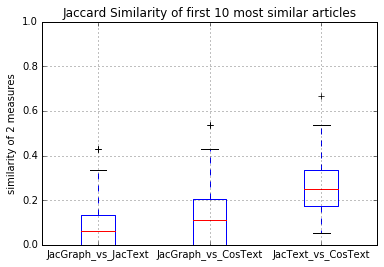

In [134]:
import math
def compare(row_x,df1_,df2_):
    #compare with values of another measurements
    Y=row_x.values.tolist()
    X=df1_.columns.values.tolist()
    X_sorted=[x for (y,x) in sorted(zip(Y,X),reverse=True) if ((y!=0) & (not math.isnan(y)))]
    #measure 2
    Y=df1_.loc[row_x.name].values.tolist()
    X_sorted_1=[x for (y,x) in sorted(zip(Y,X),reverse=True) if ((y!=0) & (not math.isnan(y)))]
    #measure 3
    Y=df2_.loc[row_x.name].values.tolist()
    X_sorted_2=[x for (y,x) in sorted(zip(Y,X),reverse=True)if ((y!=0) & (not math.isnan(y)))]
    
    diff=calcJaccardSimilarity(set(X_sorted[:10]),set(X_sorted_1[:10]))
    diff1=calcJaccardSimilarity(set(X_sorted[:10]),set(X_sorted_2[:10]))
    diff2=calcJaccardSimilarity(set(X_sorted_1[:10]),set(X_sorted_2[:10]))
    #use spearman_rank_cor, RBO, ...
    
    return diff,diff1,diff2

df_graph_jac["JacGraph_vs_JacText"],df_graph_jac["JacGraph_vs_CosText"],df_graph_jac["JacText_vs_CosText"]=\
zip(*df_graph_jac.apply(lambda x: compare(x,df_text_jac,df_text_cos),axis=1))
df_comparison=df_graph_jac[["JacGraph_vs_JacText","JacGraph_vs_CosText","JacText_vs_CosText"]]
df_comparison.boxplot(return_type='axes')
plt.ylim(0,1)
plt.ylabel("similarity of 2 measures")
plt.title("Jaccard Similarity of first 10 most similar articles");

In [1]:
#100 longest articles

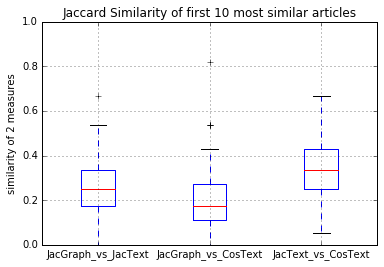

In [135]:
df_100long_graph_jac["JacGraph_vs_JacText"],df_100long_graph_jac["JacGraph_vs_CosText"],df_100long_graph_jac["JacText_vs_CosText"]=\
zip(*df_100long_graph_jac.apply(lambda x: compare(x,df_100long_text_jac,df_100long_text_cos),axis=1))
df_comparison2=df_100long_graph_jac[["JacGraph_vs_JacText","JacGraph_vs_CosText","JacText_vs_CosText"]]
df_comparison2.boxplot(return_type='axes')
plt.ylim(0,1)
plt.ylabel("similarity of 2 measures")
plt.title("Jaccard Similarity of first 10 most similar articles");

Will the results depend on the method for selecting articles? 

What are your ﬁndings?

In [ ]:
#not needed
#formula with tie correction


$$ RBO_{EXT}= \frac{1 - p}{p}
\left(\sum_{d=1}^{l}\frac{2X_d}{|S_{:d}| + |L_{:d}|}p^d
+\sum_{d=s+1}^{l}\frac{2X_s(d-s)}{(|S_{:s}| + |L_{:s}|)d}p^d\right)
+\left(\frac{X_l - X_s}{l}
+\frac{2X_s}{|S_{:s}| + |L_{:s}|}\right) p^l $$